# Analysing NBA Shot Data

In this notebook, I will attempt to analyse NBA shot data to find correlations and hopefully create models to create predictions.

We will use the shot data from the 2021-22 NBA season, as this is the last full season played.

### Importing libraries

We begin by importing the necessary libraries to allow us to import, analyse and display the data

* Pandas - will allow us to import and manipulate the .csv file 
* scipy.stats - will allow us to create linear models
* sklearn
    * .linear_model - will allow us to create regression models
    * .preprocessing.StandardScaler - will allow us to scale data fields
* matplotlib.pyplot - will allow us to create graphs

In [1]:
import pandas
from scipy import stats
from sklearn import linear_model
import matplotlib.pyplot as plt

### Importing dataset

We import the .csv file using pandas and print it in the console

In [2]:
df = pandas.read_csv('shotdata.csv')
print(df)

                Player Pos  Age   Tm   G    MP    FG%  Dist.  % of 2P  \
0     Precious Achiuwa   C   22  TOR  73  1725  0.439   10.2    0.741   
1         Steven Adams   C   28  MEM  76  1999  0.547    2.9    0.997   
2          Bam Adebayo   C   24  MIA  56  1825  0.557    7.0    0.992   
3         Santi Aldama  PF   21  MEM  32   360  0.402   12.0    0.636   
4    LaMarcus Aldridge   C   36  BRK  47  1050  0.550   12.3    0.900   
..                 ...  ..  ...  ...  ..   ...    ...    ...      ...   
600     Thaddeus Young  PF   33  TOT  52   845  0.518    7.7    0.824   
601         Trae Young  PG   23  ATL  76  2652  0.460   16.5    0.605   
602     Omer Yurtseven   C   23  MIA  56   706  0.526    5.8    0.955   
603        Cody Zeller   C   29  POR  27   355  0.567    3.7    0.956   
604        Ivica Zubac   C   24  LAC  76  1852  0.626    3.4    1.000   

     % of 0-3  ...  % of 3P  2P FG%  0-3 FG%  3-10 FG%  10-16 FG%  16-3P FG%  \
0       0.348  ...    0.259   0.468    0.61

Some of the columns have strange names, so we can rename them to make them easier to search

In [12]:
df = df.rename(columns={'Dist.':'averageDistance', 'Tm':'team', 'Pos':'position', 'Player':'player', 'G':'gamesPlayed', 'MP':'minutes', 'Age':'age'})
print(df)

                player position  age team  gamesPlayed  minutes    FG%  \
0     Precious Achiuwa        C   22  TOR           73     1725  0.439   
1         Steven Adams        C   28  MEM           76     1999  0.547   
2          Bam Adebayo        C   24  MIA           56     1825  0.557   
3         Santi Aldama       PF   21  MEM           32      360  0.402   
4    LaMarcus Aldridge        C   36  BRK           47     1050  0.550   
..                 ...      ...  ...  ...          ...      ...    ...   
600     Thaddeus Young       PF   33  TOT           52      845  0.518   
601         Trae Young       PG   23  ATL           76     2652  0.460   
602     Omer Yurtseven        C   23  MIA           56      706  0.526   
603        Cody Zeller        C   29  POR           27      355  0.567   
604        Ivica Zubac        C   24  LAC           76     1852  0.626   

     averageDistance  % of 2P  % of 0-3  ...  % of 3P  2P FG%  0-3 FG%  \
0               10.2    0.741     0.3

By having usernames unique to each player, we can search for players by name and username, which is usually in the format (surname+firstname[:2]+01)

In [15]:
df.loc[df['player'] == 'Trae Young']

,player,position,age,team,gamesPlayed,minutes,FG%,averageDistance,% of 2P,% of 0-3,...,% of 3P,2P FG%,0-3 FG%,3-10 FG%,10-16 FG%,16-3P FG%,3P FG%,% of 2P assisted,% of 3P assisted,username
601,Trae Young,PG,23,ATL,76,2652,0.46,16.5,0.605,0.159,...,0.395,0.512,0.62,0.451,0.469,0.513,0.382,0.142,0.223,youngtr01


In [16]:
df.loc[df['username'] == 'youngtr01']

,player,position,age,team,gamesPlayed,minutes,FG%,averageDistance,% of 2P,% of 0-3,...,% of 3P,2P FG%,0-3 FG%,3-10 FG%,10-16 FG%,16-3P FG%,3P FG%,% of 2P assisted,% of 3P assisted,username
601,Trae Young,PG,23,ATL,76,2652,0.46,16.5,0.605,0.159,...,0.395,0.512,0.62,0.451,0.469,0.513,0.382,0.142,0.223,youngtr01


For example, we can search for Trae Young by both his name and his username 'youngtr01'

In [17]:
df.loc[df['player'] == 'Jordan Bell']

,player,position,age,team,gamesPlayed,minutes,FG%,averageDistance,% of 2P,% of 0-3,...,% of 3P,2P FG%,0-3 FG%,3-10 FG%,10-16 FG%,16-3P FG%,3P FG%,% of 2P assisted,% of 3P assisted,username
42,Jordan Bell,C,27,CHI,1,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,belljo01


Some players have limited information, so we need to fill it with placeholders

In [19]:
df.fillna(0.0, inplace = True)
df.loc[df['player'] == 'Jordan Bell']

,player,position,age,team,gamesPlayed,minutes,FG%,averageDistance,% of 2P,% of 0-3,...,% of 3P,2P FG%,0-3 FG%,3-10 FG%,10-16 FG%,16-3P FG%,3P FG%,% of 2P assisted,% of 3P assisted,username
42,Jordan Bell,C,27,CHI,1,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,belljo01


## Finding Correlations

We can now use corr() to find potential correlations between stats

In [20]:
df.corr()

,age,gamesPlayed,minutes,FG%,averageDistance,% of 2P,% of 0-3,% of 3-10,% of 10-16,% of 16-3P,% of 3P,2P FG%,0-3 FG%,3-10 FG%,10-16 FG%,16-3P FG%,3P FG%,% of 2P assisted,% of 3P assisted
age,1.000000,0.094621,0.110532,0.071849,0.085518,-0.035877,-0.094469,-0.070507,0.038362,0.176017,0.043341,0.067902,0.052070,0.074779,0.095321,0.102630,0.094510,0.048379,0.044997
gamesPlayed,0.094621,1.000000,0.894793,0.346560,0.049092,0.057403,0.023781,0.098723,0.016426,-0.052496,0.045626,0.300521,0.401799,0.398171,0.411582,0.301645,0.429241,0.154610,0.362129
minutes,0.110532,0.894793,1.000000,0.280437,0.078322,0.044194,-0.060978,0.083038,0.094709,0.037062,0.032496,0.232989,0.330709,0.337675,0.399940,0.281789,0.396282,0.012228,0.236834
FG%,0.071849,0.346560,0.280437,1.000000,-0.321866,0.530418,0.494398,0.270686,0.046255,-0.019110,-0.349433,0.855531,0.593876,0.485312,0.325545,0.205213,0.206857,0.464792,0.126579
averageDistance,0.085518,0.049092,0.078322,-0.321866,1.000000,-0.745839,-0.765884,-0.492710,0.039296,0.241255,0.928454,-0.148490,-0.092733,-0.087458,0.045182,0.210024,0.442009,-0.126129,0.354342
% of 2P,-0.035877,0.057403,0.044194,0.530418,-0.745839,1.000000,0.720099,0.613137,0.269630,0.085329,-0.866804,0.313145,0.236639,0.216093,0.143112,-0.037750,-0.282938,0.145422,-0.238323
% of 0-3,-0.094469,0.023781,-0.060978,0.494398,-0.765884,0.720099,1.000000,0.238582,-0.212575,-0.270083,-0.646110,0.375307,0.312805,0.093205,-0.086146,-0.181754,-0.319523,0.377834,-0.212586
% of 3-10,-0.070507,0.098723,0.083038,0.270686,-0.492710,0.613137,0.238582,1.000000,-0.029764,-0.202049,-0.531092,0.124345,0.063452,0.318666,0.135619,-0.051267,-0.111403,-0.010719,-0.071613
% of 10-16,0.038362,0.016426,0.094709,0.046255,0.039296,0.269630,-0.212575,-0.029764,1.000000,0.172474,-0.222279,-0.027098,0.005784,0.038693,0.299065,0.082041,-0.004109,-0.161658,-0.070882
% of 16-3P,0.176017,-0.052496,0.037062,-0.019110,0.241255,0.085329,-0.270083,-0.202049,0.172474,1.000000,-0.036758,-0.087382,-0.118688,-0.098881,0.071406,0.292901,0.066114,-0.234726,-0.030839


The correlations are between -1 and 1 with values closer to these numbers indicating a more inverse or proportional relationship, respectively. The centre line has a correlation of 1 because those are where the fields intersect, however, we are looking for relationship with a correlation >0.6 or <-0.6 as these are relatively strong.

Because there are 23 columns, there are 526 relationships, which are too many to analyse, therefore we need a way to visualise this. We can import the seaborn library to help us.

In [21]:
import seaborn as sns

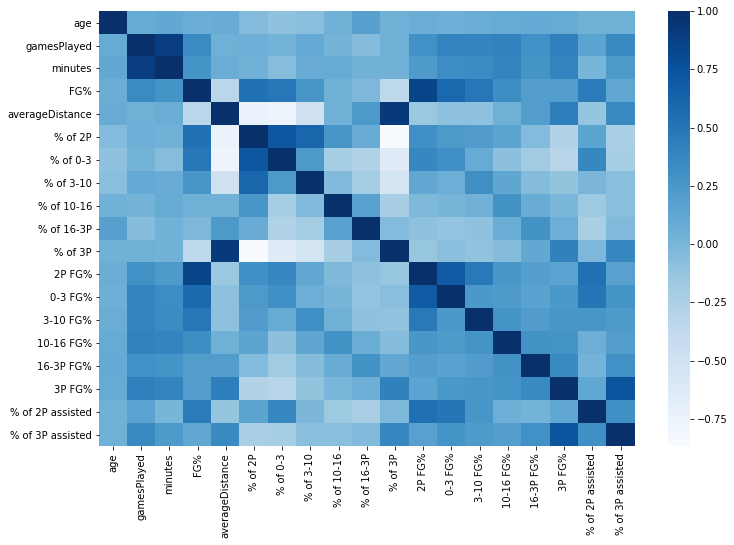

In [23]:
shotCorrelation = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(shotCorrelation,cmap = 'Blues')

In [29]:
import numpy as np

distAv = df.loc[:,"averageDistance"].to_numpy()
ThreePointPer = df.loc[:,"% of 3P"].to_numpy()*100

print(distAv)
print(ThreePointPer)

[10.2  2.9  7.  12.  12.3 15.8 19.2  3.8 13.6 18.9 10.7 10.   5.3 19.1
 16.2 15.1 21.5 19.3 20.3 14.4 12.6  7.   2.8  9.2 15.9 19.9 14.3 16.8
 11.   9.6 13.5 10.9 12.  16.  11.7  5.6  8.4 20.2 18.1 12.7 13.1 20.8
  0.   6.2 23.  16.6 17.4  6.4 10.4  4.3 14.1 14.2 18.4 18.6 15.6 10.6
 13.7 11.  16.1 14.7 12.1 12.  18.1  3.9 14.  13.3 12.4 13.9 13.2 23.4
 13.3  8.4 11.  17.9 10.7 14.5  2.5 17.1 15.  13.1 11.5 13.6 20.9 17.
 17.4 18.4  9.6  4.6 18.1 19.4 10.6 22.5  2.2  8.2 21.2 12.1 15.4  5.3
  1.8 11.7 17.2 19.4  7.8 13.3 20.1  5.4 16.9  2.5 16.8 11.  11.  16.1
 17.1 20.2  2.2 11.6 15.9 12.1 18.8 16.  20.8 13.5 15.8 13.8 19.4 19.8
  9.6  2.3 16.3 11.9  8.2  0.   0.  13.   6.8  3.1  9.5 19.2 15.6 18.6
 15.9 16.4 12.3 11.3 12.2  8.9 14.8 17.2 15.2  2.8 15.5 10.6  9.1 15.1
  0.  15.2 17.6 15.4 24.3 13.4 23.4 11.9 10.6  6.2  3.2  9.7  4.  17.
 16.7 18.2 19.5 19.5  8.8 19.6 12.4 12.4 17.4  4.4 11.1  8.5  2.9 18.4
 19.4 15.5  9.3 12.6 12.7 17.4 16.6  9.9 12.7 12.1  9.2  6.5  2.7 13.9
 16.6 11

We can get the average shot distance and three point percentage for every player in this dataset.

## Linear Regression

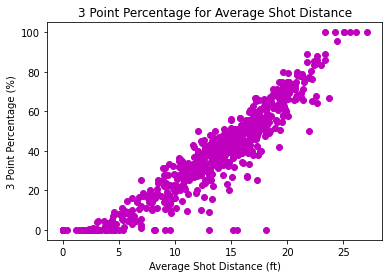

In [31]:
plt.title("3 Point Percentage for Average Shot Distance")
plt.xlabel("Average Shot Distance (ft)")
plt.ylabel("3 Point Percentage (%)")
plt.scatter(distAv,ThreePointPer,c='m')
plt.show()

Plotting these two values against each other shows a clear relationship, possibly because better three point shooters feel more comfortable shooting from distance.

### Straight Lines

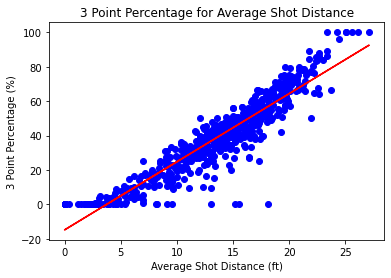

In [32]:
slope, intercept, r, p, std_err = stats.linregress(distAv, ThreePointPer)

def getYValue(xValue,m,c):
    return (m*xValue) + c

predictedThreePointShotPercentage = []
for plot in distAv:
    predictedThreePointShotPercentage.append(getYValue(plot, slope, intercept))
    
plt.title("3 Point Percentage for Average Shot Distance")
plt.xlabel("Average Shot Distance (ft)")
plt.ylabel("3 Point Percentage (%)")
plt.scatter(distAv,ThreePointPer,c='b')
plt.plot(distAv,predictedThreePointShotPercentage,c='r')
plt.show()

Using linear regression, we can plot a line of best fit - predicting a player's three point percentage based on their average shot distance.

In [73]:
def printPlayerShotChart(name):
    player = df.loc[df['player'] == name]
    shotDistances = np.array([1.5,6.5,13,20,26])
    shotPercentages = np.array([player["0-3 FG%"].values[0],player["3-10 FG%"].values[0],player["10-16 FG%"].values[0],player["16-3P FG%"].values[0],player["3P FG%"].values[0]])*100
    
    print(shotDistances)
    print(shotPercentages)
    
    plt.title(f"Shot Percentages at Distance - {name}")
    plt.xlabel("Shot Distance (ft)")
    plt.ylabel("Shot Percentage (%)")
    plt.scatter(shotDistances,shotPercentages,c='b')
    #plt.plot(distAv,predictedThreePointShotPercentage,c='r')
    plt.show()

[ 1.5  6.5 13.  20.  26. ]
[69.4 47.6 46.9 46.9 38.3]


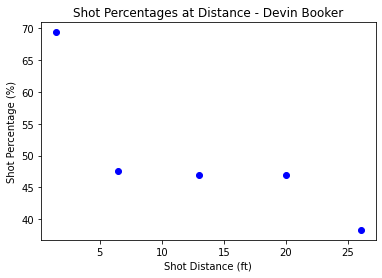

In [74]:
printPlayerShotChart("Devin Booker")

The function printPlayerShotChart allows us to take a player and plot their shot percentage at given distances. To get the distance for each category, I decided to take the middle value in each range, whilst also assuming that the category '3P FG%' should represent shots between 23 to 30 feet from the basket.

### Curves

In [80]:
def createPolynomialCurve(distances,averages):
    coefficients = np.polyfit(distances,averages,3)
    model = np.poly1d(coefficients)
    line = np.linspace(0,30,100)
    curve = model(line)
    return line,curve

Using np.polyfit, we are able to create a polynomial curve to fit the points. This function will generate a x^3 curve between 0 to 30.

In [76]:
def printPlayerShotChartWithCurve(name):
    player = df.loc[df['player'] == name]
    shotDistances = np.array([1.5,6.5,13,20,26])
    shotPercentages = np.array([player["0-3 FG%"].values[0],player["3-10 FG%"].values[0],player["10-16 FG%"].values[0],player["16-3P FG%"].values[0],player["3P FG%"].values[0]])*100
    
    print(shotDistances)
    print(shotPercentages)
    
    plt.title(f"Shot Percentages at Distance - {name}")
    plt.xlabel("Shot Distance (ft)")
    plt.ylabel("Shot Percentage (%)")
    plt.scatter(shotDistances,shotPercentages,c='b')
    polyLine = createPolynomialCurve(shotDistances,shotPercentages)
    plt.plot(polyLine[0],polyLine[1],c='r')
    plt.show()

[ 1.5  6.5 13.  20.  26. ]
[69.4 47.6 46.9 46.9 38.3]


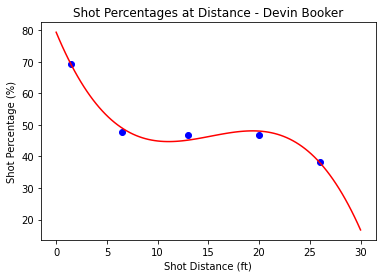

In [82]:
printPlayerShotChartWithCurve("Devin Booker")

[ 1.5  6.5 13.  20.  26. ]
[79.5 61.9 50.7 25.6 36.9]


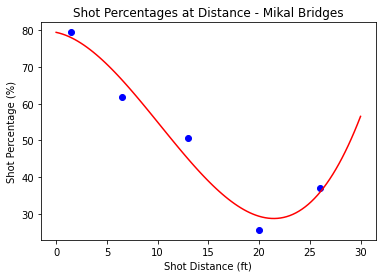

In [81]:
printPlayerShotChartWithCurve("Mikal Bridges")

[ 1.5  6.5 13.  20.  26. ]
[59.9 53.  51.3 41.4 38. ]


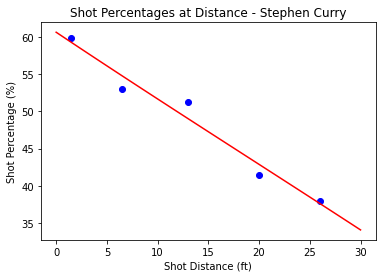

In [84]:
printPlayerShotChartWithCurve("Stephen Curry")

[ 1.5  6.5 13.  20.  26. ]
[74.4 51.6 52.8 57.5 38.3]


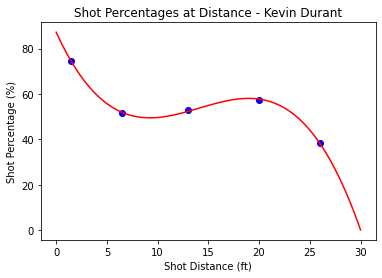

In [85]:
printPlayerShotChartWithCurve("Kevin Durant")

These are examples of plots created by the functions that show the modelled line based on the lists provided.

In [108]:
def printLeagueShotChartScatter():
    shotDistances = np.array([1.5,6.5,13,20,26])
    shotAverages = []
    
    for player in df.index:
        shotAverages.append([df["0-3 FG%"][player],df["3-10 FG%"][player],df["10-16 FG%"][player],df["16-3P FG%"][player],df["3P FG%"][player]])
    shotAverages = np.array(shotAverages)*100
    print(shotDistances)
    print(shotAverages)
    
    for playerAverage in shotAverages:
        curve = createPolynomialCurve(shotDistances,playerAverage)
        plt.plot(curve[0],curve[1],c='r')
        plt.scatter(shotDistances,playerAverage,c='b')
    plt.show()
        

[ 1.5  6.5 13.  20.  26. ]
[[ 61.4  34.5  37.3  19.   35.9]
 [ 63.2  35.   43.8   0.    0. ]
 [ 77.1  46.7  40.4  31.3   0. ]
 ...
 [ 72.2  43.2  35.7   0.    9.1]
 [ 62.1  54.2  33.3 100.    0. ]
 [ 71.4  50.8  50.   33.3   0. ]]


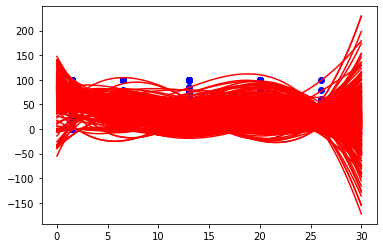

In [109]:
printLeagueShotChartScatter()

These are the curves generated by using all of the players in the dataset, which doesn't provide a clear pattern.

In [112]:
def meanLeagueAverages():
    
    shotDistances = np.array([1.5,6.5,13,20,26])
    leagueAverages = np.array([
        np.mean(df.loc[:,"0-3 FG%"].to_numpy()*100),
        np.mean(df.loc[:,"3-10 FG%"].to_numpy()*100),
        np.mean(df.loc[:,"10-16 FG%"].to_numpy()*100),
        np.mean(df.loc[:,"16-3P FG%"].to_numpy()*100),
        np.mean(df.loc[:,"3P FG%"].to_numpy()*100),
    ])
    
    plt.title("League Averages per Shot Distance")
    plt.xlabel("Shot Distance (ft)")
    plt.ylabel("Shot Percentage (%)")
    plt.scatter(shotDistances,leagueAverages,c='b')
    polyLine = createPolynomialCurve(shotDistances,leagueAverages)
    plt.plot(polyLine[0],polyLine[1],c='r')
    plt.show()
    

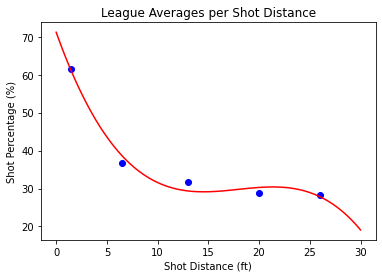

In [113]:
meanLeagueAverages()

By averaging out all the players, we get a single line that shows the league shooting capabilities. The made shot percentage decreases with distance, which tracks with the popular assumption that players shoot better at distances close to the rim.

### Weighting the averages

In [114]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [125]:
def printPlayerWeightedShotChartWithCurve(name):
    player = df.loc[df['player'] == name]
    shotDistances = np.array([1.5,6.5,13,20,26])
    weightedPercentages = np.array([player["0-3 FG%"].values[0]*player["% of 0-3"].values[0],
                                player["3-10 FG%"].values[0]*player["% of 3-10"].values[0],
                                player["10-16 FG%"].values[0]*player["% of 10-16"].values[0],
                                player["16-3P FG%"].values[0]*player["% of 16-3P"].values[0],
                                player["3P FG%"].values[0]*player["% of 3P"].values[0]
                               ])*100
    
    print(shotDistances)
    print(weightedPercentages)
    
    plt.title(f"Weighted Shot Percentages at Distance - {name}")
    plt.xlabel("Shot Distance (ft)")
    plt.ylabel("Weighted Shot Percentage (%)")
    plt.scatter(shotDistances,weightedPercentages,c='b')
    polyLine = createPolynomialCurve(shotDistances,weightedPercentages)
    plt.plot(polyLine[0],polyLine[1],c='r',label=)
    plt.show()

This function will weight the shot averages with the percentage of shots taken at that distance to allow us to see distances where a player is a better and more frequent shooter.

[ 1.5  6.5 13.  20.  26. ]
[ 7.188   7.102   3.1806  2.9394 23.294 ]


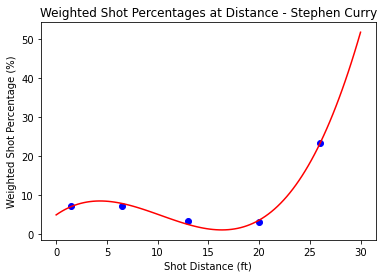

In [128]:
printPlayerWeightedShotChartWithCurve("Stephen Curry")

Using this function shows that Steph Curry is a better and more frequent shooter from behind the three point line, which is true in reality.

In [129]:
printPlayerWeightedShotChartWithCurve("Steve Nash")

IndexError: index 0 is out of bounds for axis 0 with size 0

Using a retired player throws an error because they are not in the dataset.

In [131]:
def printPlayerWeightedShotChartWithCurve(name):
    try:
        player = df.loc[df['player'] == name]
        shotDistances = np.array([1.5,6.5,13,20,26])
        weightedPercentages = np.array([player["0-3 FG%"].values[0]*player["% of 0-3"].values[0],
                                    player["3-10 FG%"].values[0]*player["% of 3-10"].values[0],
                                    player["10-16 FG%"].values[0]*player["% of 10-16"].values[0],
                                    player["16-3P FG%"].values[0]*player["% of 16-3P"].values[0],
                                    player["3P FG%"].values[0]*player["% of 3P"].values[0]
                                   ])*100
    except IndexError:
        print("No player exists with that name")
    else:
        print(shotDistances)
        print(weightedPercentages)

        plt.title(f"Weighted Shot Percentages at Distance - {name}")
        plt.xlabel("Shot Distance (ft)")
        plt.ylabel("Weighted Shot Percentage (%)")
        plt.scatter(shotDistances,weightedPercentages,c='b')
        polyLine = createPolynomialCurve(shotDistances,weightedPercentages)
        plt.plot(polyLine[0],polyLine[1],c='r')
        plt.show()

To fix this we can add try-except to the function because it will stop the function before it returns an error.

In [132]:
printPlayerWeightedShotChartWithCurve("Steve Nash")

No player exists with that name


[ 1.5  6.5 13.  20.  26. ]
[ 9.4355  4.329   5.7671  1.45   19.5624]


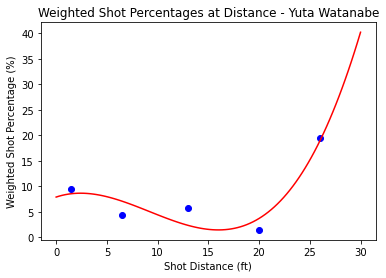

In [133]:
printPlayerWeightedShotChartWithCurve("Yuta Watanabe")

[ 1.5  6.5 13.  20.  26. ]
[23.4392 12.6003  5.184   0.6025  7.4992]


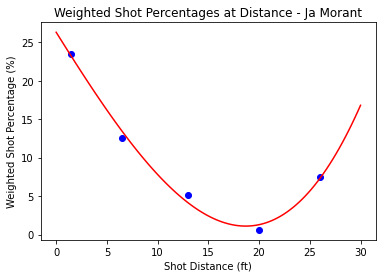

In [134]:
printPlayerWeightedShotChartWithCurve("Ja Morant")

[ 1.5  6.5 13.  20.  26. ]
[ 7.634   7.5208 10.5056  8.0199 12.8688]


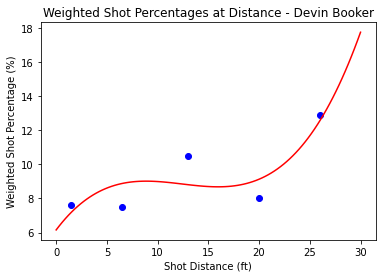

In [135]:
printPlayerWeightedShotChartWithCurve("Devin Booker")

[ 1.5  6.5 13.  20.  26. ]
[25.87    6.5565  2.7886  4.0044 13.1753]


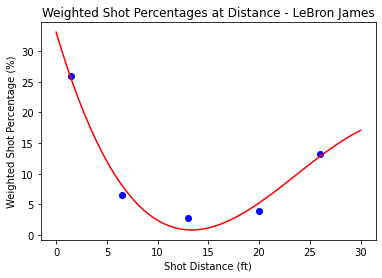

In [137]:
printPlayerWeightedShotChartWithCurve("LeBron James")

In [138]:
printPlayerWeightedShotChartWithCurve("Giannis Antentukumpo")

No player exists with that name


[ 1.5  6.5 13.  20.  26. ]
[32.8048  8.3358  4.992   3.5342  5.6842]


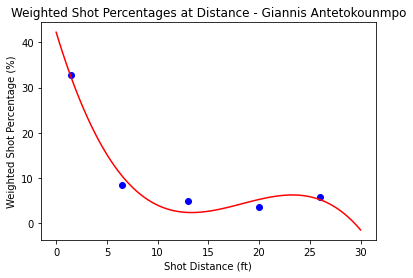

In [139]:
printPlayerWeightedShotChartWithCurve("Giannis Antetokounmpo")

In [140]:
import re

In [147]:
def findPlayers():
    query = input("Which player(s) do you want to find?: ")
    results = df.loc[(df['player'].str.contains(query, case=False)),'player']
    print(results)
    playerNum = int(input("Select your player by number: "))
    return df.loc[playerNum,'player']

The findPlayers function allows us to search the dataframe for player names to feed in into the plot functions.

Which player(s) do you want to find?: dur
153    Kevin Durant
Name: player, dtype: object
Select your player by number: 153
[ 1.5  6.5 13.  20.  26. ]
[ 8.1096  7.3788 16.8432  9.2575 10.3027]


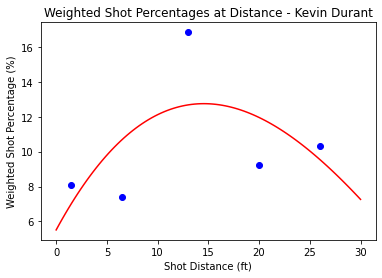

In [148]:
printPlayerWeightedShotChartWithCurve(findPlayers())

Which player(s) do you want to find?: james
61     James Bouknight
162    James Ennis III
217       James Harden
273       LeBron James
283      James Johnson
Name: player, dtype: object
Select your player by number: 217
[ 1.5  6.5 13.  20.  26. ]
[13.8138  8.584   2.5986  1.0992 14.916 ]


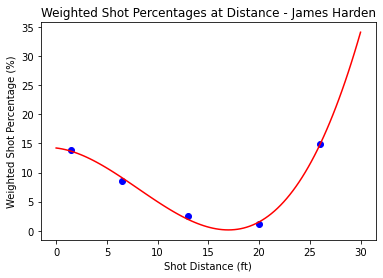

In [149]:
printPlayerWeightedShotChartWithCurve(findPlayers())

In [158]:
def findPlayers():
    query = input("Which player(s) do you want to find?: ")
    results = df.loc[(df['player'].str.contains(query, case=False)),'player']
    print(results)
    playerNum = int(input("Select your player by number: "))
    return df.loc[playerNum,'player']

Which player(s) do you want to find?: chris
60        Chris Boucher
101       Chris Chiozza
102     Marquese Chriss
103    Josh Christopher
150        Chris Duarte
437          Chris Paul
501         Chris Silva
594      Christian Wood
Name: player, dtype: object
Select your player by number: 437
[ 1.5  6.5 13.  20.  26. ]
[ 2.448   8.5794 20.4832  9.2544  8.559 ]


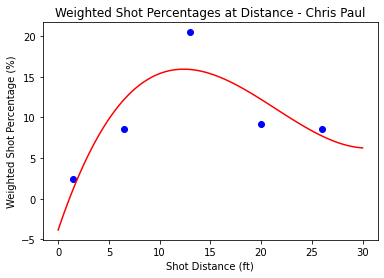

In [160]:
printPlayerWeightedShotChartWithCurve(findPlayers())

In [175]:
def printPlayerWeightedShotChartWithCurve(name):
    try:
        player = df.loc[df['player'] == name]
        shotDistances = np.array([1.5,6.5,13,20,26])
        weightedPercentages = np.array([player["0-3 FG%"].values[0]*player["% of 0-3"].values[0],
                                    player["3-10 FG%"].values[0]*player["% of 3-10"].values[0],
                                    player["10-16 FG%"].values[0]*player["% of 10-16"].values[0],
                                    player["16-3P FG%"].values[0]*player["% of 16-3P"].values[0],
                                    player["3P FG%"].values[0]*player["% of 3P"].values[0]
                                   ])*100
    except IndexError:
        print("No player exists with that name")
    else:
        print(shotDistances)
        print(weightedPercentages)
        print(player["averageDistance"].values[0])
        
        averageDistance = player["averageDistance"].values[0]

        plt.title(f"Weighted Shot Percentages at Distance - {name} (2021-22)")
        plt.xlabel("Distance From Basket (ft)")
        plt.ylabel("Weighted Shot Percentage (%)")
        plt.scatter(shotDistances,weightedPercentages,c='b',label='Actual Weighted Percentage')
        polyLine = createPolynomialCurve(shotDistances,weightedPercentages)
        plt.plot(polyLine[0],polyLine[1],c='r',label='Modelled Weighted Percentage')
        plt.axvline(x=averageDistance,c='g',label='Average Shot Distance')
        plt.legend()
        plt.show()

We can further update the plot function by adding a line to represent this player's particular average shot distance.

Which player(s) do you want to find?: ic
5      Nickeil Alexander-Walker
37                Nicolas Batum
45             Patrick Beverley
50              Nemanja Bjelica
51                 Eric Bledsoe
107                 Nic Claxton
135               Cheick Diallo
165              Derrick Favors
198                 Eric Gordon
218            Maurice Harkless
246              Richaun Holmes
292           Derrick Jones Jr.
424              Victor Oladipo
436               Eric Paschall
443             Jamorko Pickett
451          Michael Porter Jr.
455                Micah Potter
464           Immanuel Quickley
472               Nick Richards
473             Josh Richardson
481                Derrick Rose
484                 Ricky Rubio
502             Marko Simonovic
505                Jericho Sims
532              Brodric Thomas
565              Derrick Walton
577               Derrick White
585            Kenrich Williams
587            Patrick Williams
604                 Ivica Zubac

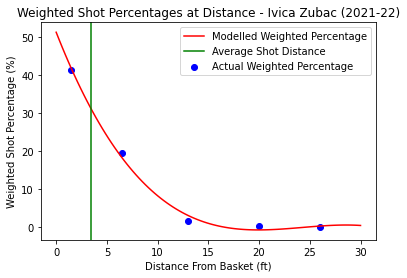

In [185]:
printPlayerWeightedShotChartWithCurve(findPlayers())

In [186]:
print(df['gamesPlayed'].corr(df['minutes']))

0.8947931438376344


In [187]:
def createPolynomialCurve(distances,averages):
    coefficients = np.polyfit(distances,averages,3)
    model = np.poly1d(coefficients)
    line = np.linspace(1.5,26,100)
    curve = model(line)
    return line,curve

This updates the curve function to draw the line between 1.5 and 26 feet so that we only draw lines for distances that we have; it prevents the curve from behaving wildly at the extremes.

Which player(s) do you want to find?: kevin
153        Kevin Durant
254       Kevin Huerter
311          Kevin Knox
338          Kevin Love
434        Kevin Pangos
450    Kevin Porter Jr.
Name: player, dtype: object
Select your player by number: 153
[ 1.5  6.5 13.  20.  26. ]
[ 8.1096  7.3788 16.8432  9.2575 10.3027]
15.1


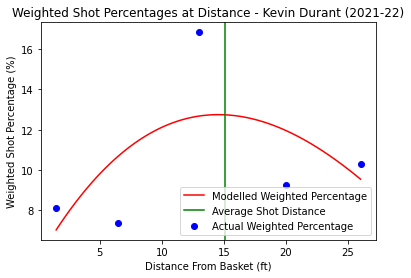

In [188]:
printPlayerWeightedShotChartWithCurve(findPlayers())

Here is a complete graph that shows Kevin Durant's shot data. He shoots mid-range shots with a higher accuracy and frequency than other locations, a point further reinforced by his average shot distance being at mid-range.

Below are further examples of this with different players:

Which player(s) do you want to find?: paul
188     Paul George
379    Paul Millsap
437      Chris Paul
470       Paul Reed
573     Paul Watson
Name: player, dtype: object
Select your player by number: 437
[ 1.5  6.5 13.  20.  26. ]
[ 2.448   8.5794 20.4832  9.2544  8.559 ]
16.4


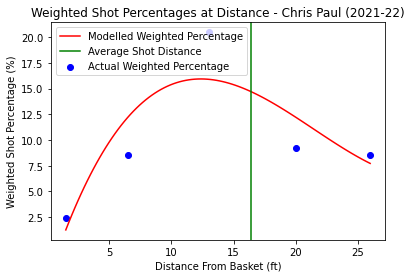

In [189]:
printPlayerWeightedShotChartWithCurve(findPlayers())

Which player(s) do you want to find?: dea
21       Deandre Ayton
43     DeAndre' Bembry
299     DeAndre Jordan
557          Dean Wade
Name: player, dtype: object
Select your player by number: 21
[ 1.5  6.5 13.  20.  26. ]
[26.4069 23.3436 10.212   2.4485  0.9936]
7.0


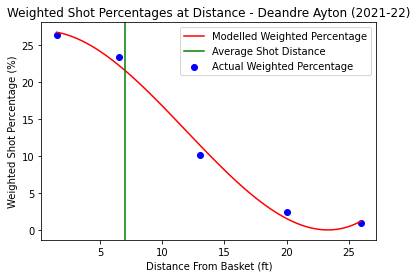

In [190]:
printPlayerWeightedShotChartWithCurve(findPlayers())

Which player(s) do you want to find?: shai
191    Shai Gilgeous-Alexander
Name: player, dtype: object
Select your player by number: 191
[ 1.5  6.5 13.  20.  26. ]
[14.564  14.24    5.7902  2.303   8.46  ]
12.1


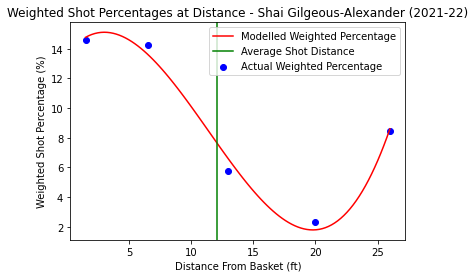

In [191]:
printPlayerWeightedShotChartWithCurve(findPlayers())

Which player(s) do you want to find?: luk
140     Luka Dončić
186      Luka Garza
303    Luke Kennard
314     Luke Kornet
Name: player, dtype: object
Select your player by number: 140
[ 1.5  6.5 13.  20.  26. ]
[ 9.9584 11.9261  7.26    2.2072 14.3318]
15.9


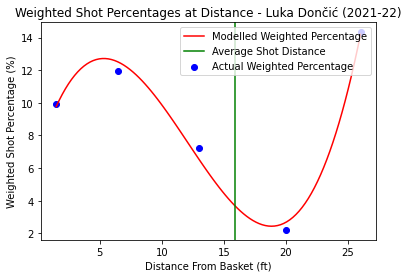

In [192]:
printPlayerWeightedShotChartWithCurve(findPlayers())

Which player(s) do you want to find?: lillard
331    Damian Lillard
Name: player, dtype: object
Select your player by number: 331
[ 1.5  6.5 13.  20.  26. ]
[13.4079  2.1868  3.2486  4.6864 16.6536]
17.9


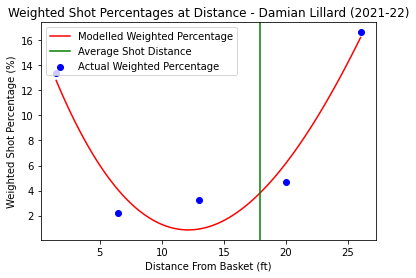

In [194]:
printPlayerWeightedShotChartWithCurve(findPlayers())